In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-830c3a369e7a>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv("AAPL.csv")
df.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
1,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
3,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
4,2012-01-10,15.214286,15.053571,15.211071,15.115714,258196400.0,13.020121


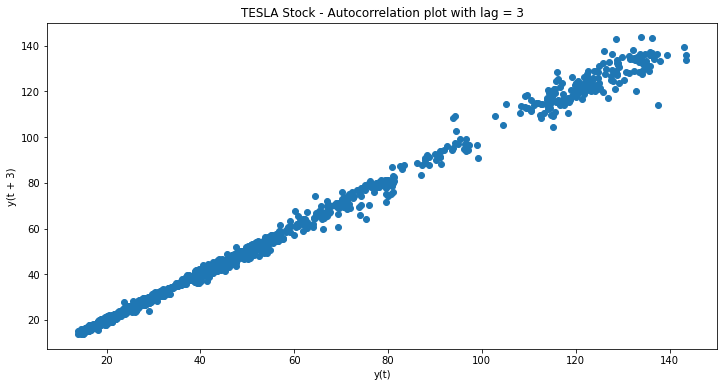

In [3]:
plt.figure(figsize=(12,6))
lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

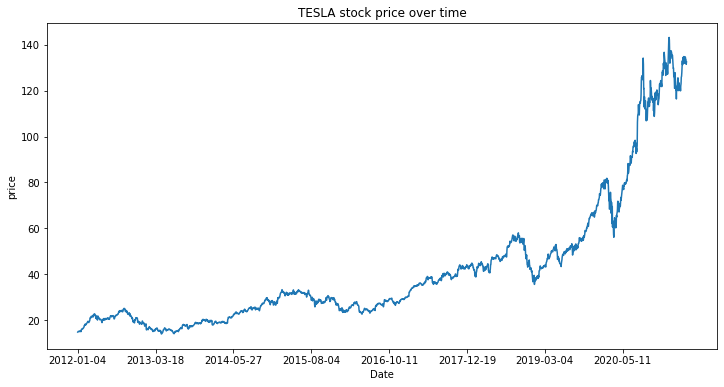

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,2400, 300), df['Date'][0:2400:300])
plt.title("TESLA stock price over time")
plt.xlabel("Date")
plt.ylabel("price")
plt.show()

In [5]:
df['Date'][0:2400:300]

0       2012-01-04
300     2013-03-18
600     2014-05-27
900     2015-08-04
1200    2016-10-11
1500    2017-12-19
1800    2019-03-04
2100    2020-05-11
Name: Date, dtype: object

In [6]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

Testing Mean Squared Error is 3.598519267649626


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (7).

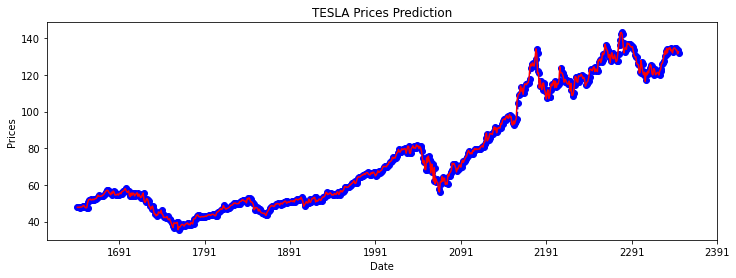

In [7]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(12,4))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1691,2400,100), df.Date[1691:2400:100])
plt.legend()
plt.show()

In [ ]:
np.arange(0,2400, 300), df['Date'][0:2400:300]

In [ ]:
df.Date[1691:2400:100]

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print("R-Square Error:", metrics.r2_score(test_data, model_predictions))
print("Mean Absolute Error:", metrics.mean_absolute_error(test_data, model_predictions))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(test_data, model_predictions)))
print("Mean Squared Error:", metrics.mean_absolute_error(test_data,model_predictions))